  # Transactions Multiple Regression-Correlation

## 1. Import required libraries

In [3]:
if(!is.element("devtools", installed.packages()[,1])){
  install.packages("devtools")
}

if(!is.element("DBI", installed.packages()[,1])){
  devtools::install_github("rstats-db/DBI")
}

if(!is.element("RPostgres", installed.packages()[,1])){
  devtools::install_github("rstats-db/RPostgres")
}

library(RPostgres)
library(DBI)

## 2. Load data from Database using SQL query

In [4]:
con <- dbConnect(RPostgres::Postgres(), host='localhost', port='5433', dbname='bandit-nbs', user='bandit', password="orF9YuPWVajej5tC6cfiro94BoxrzsoE")
transactions <- dbGetQuery(con, 'SELECT * FROM "Transaction"')
rownames(transactions) <- transactions$Id
summary(transactions)
transactions_numeric <- transactions[, sapply(transactions, is.numeric)]

      Id             DebitBank          CreditBank          ClientId        
 Length:7980        Length:7980        Length:7980        Length:7980       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 ClientGender       ClientBirthDate                      ClientAge    
 Length:7980        Min.   :1930-01-05 18:15:45.0000   Min.   :18.00  
 Class :character   1st Qu.:1948-07-24 10:45:09.2500   1st Qu.:34.00  
 Mode  :character   Median :1967-12-17 18:49:19.5000   Median :50.00  
                    Mean   :1968-01-07 03:15:07.1164   Mean   :49.93  
                    3rd Qu.:1987-09-27 16:49:25.5000   3rd Qu.:64.00  
                    Max.   :2005-12

As we can see in the summary, the columns are correctly interpreted, we can continue

## 3. Plot all regression-correlation

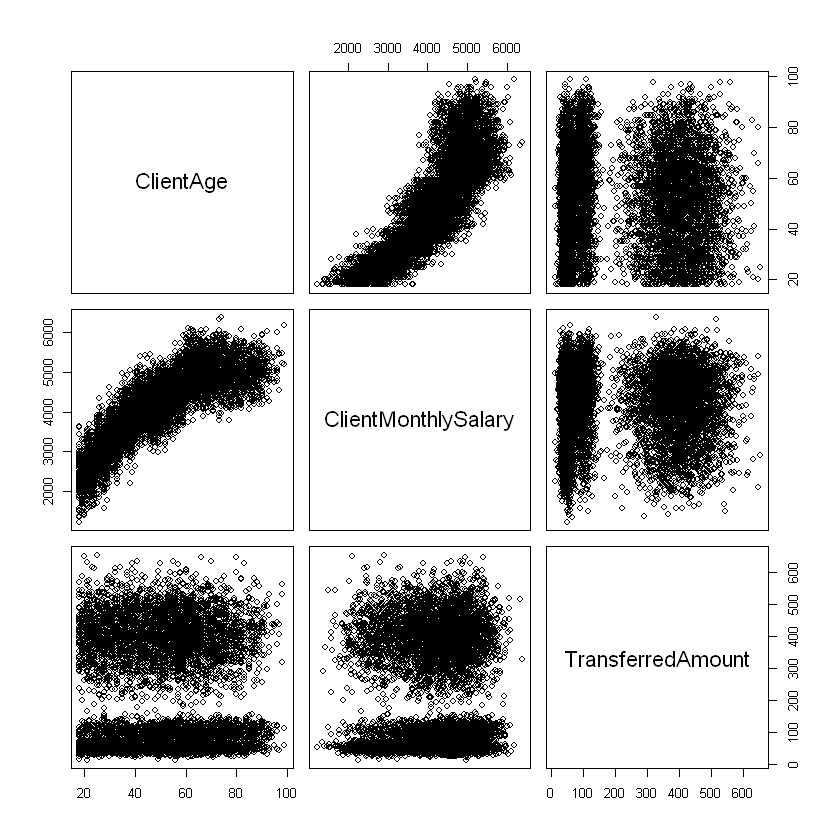

In [5]:
plot(transactions_numeric)

Based on this visual result we can definetly see that there is a correlation between the ClientAge and the ClientMonthlySalary variables
But let's do a multiple regression correlation to be a little bit more precise

In [6]:
reg <- lm(transactions$ClientAge ~ transactions$ClientMonthlySalary + transactions$TransferredAmount)
summary(reg)


Call:
lm(formula = transactions$ClientAge ~ transactions$ClientMonthlySalary + 
    transactions$TransferredAmount)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.150  -6.888  -0.969   5.572  41.023 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -2.253e+01  5.376e-01 -41.910   <2e-16 ***
transactions$ClientMonthlySalary  1.749e-02  1.242e-04 140.774   <2e-16 ***
transactions$TransferredAmount    5.100e-04  6.445e-04   0.791    0.429    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.14 on 7977 degrees of freedom
Multiple R-squared:  0.7139,	Adjusted R-squared:  0.7138 
F-statistic:  9951 on 2 and 7977 DF,  p-value: < 2.2e-16


As we can see, the summary of the model indicates that the **p-value for the ClientMonthlySalary is very low (2e-16)**,
thus we can reject the null hypothesis that says that there's no correlation between the ClientAge and the ClientMonthlySalary

On the other side, **the p-value for the TransferredAmount is not negligeable (0.429)**, thus we won't reject the null hypothesis.
Based on this we can't say that there's a correlation between the Age and the TransferredAmount

Moreover, the R² value (0.7139) shows us that our model is quite good, but maybe we could do better if we hecked the AIC Criteria

In [7]:
step(reg)

Start:  AIC=36969.19
transactions$ClientAge ~ transactions$ClientMonthlySalary + transactions$TransferredAmount

                                   Df Sum of Sq     RSS   AIC
- transactions$TransferredAmount    1        64  819747 36968
<none>                                           819683 36969
- transactions$ClientMonthlySalary  1   2036348 2856031 46928

Step:  AIC=36967.82
transactions$ClientAge ~ transactions$ClientMonthlySalary

                                   Df Sum of Sq     RSS   AIC
<none>                                           819747 36968
- transactions$ClientMonthlySalary  1   2045030 2864777 46951



Call:
lm(formula = transactions$ClientAge ~ transactions$ClientMonthlySalary)

Coefficients:
                     (Intercept)  transactions$ClientMonthlySalary  
                       -22.44236                           0.01749  


Here the difference is very small, but it seems that the model is just a little bit better if it only takes into account ClientAge and ClientMonthlySalary

(From **AIC 36969.19 to 36967.82**)

Let's update our model and plot it !

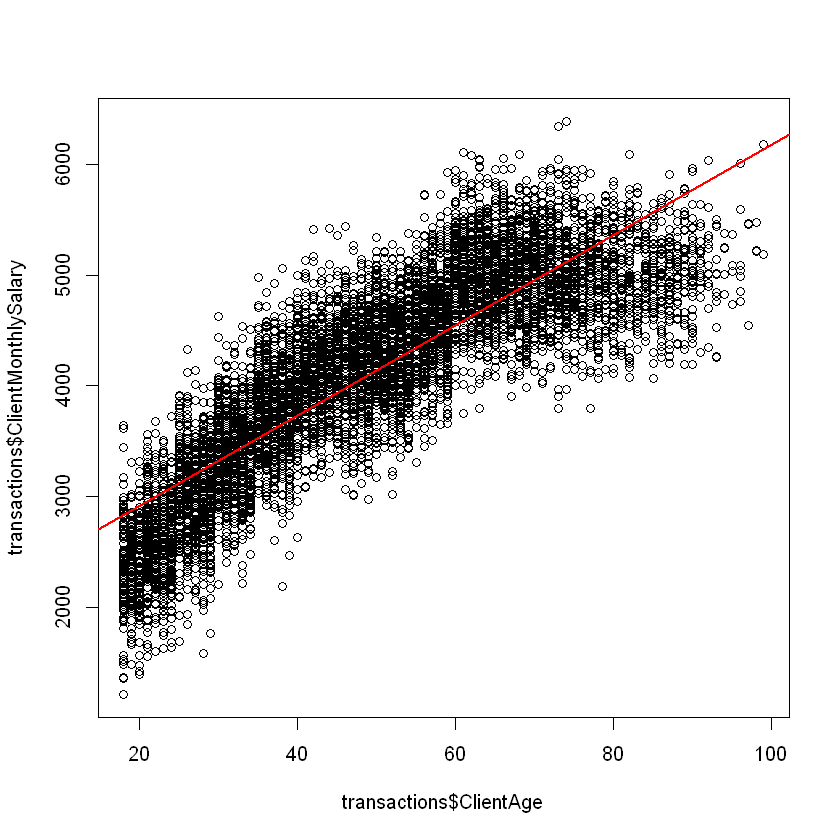

In [8]:
reg <- lm(transactions$ClientMonthlySalary ~ transactions$ClientAge)
plot(transactions$ClientMonthlySalary ~ transactions$ClientAge)
abline(reg, col="red", lwd=2)

We can also check for the residuals in order to adjust correctly our model

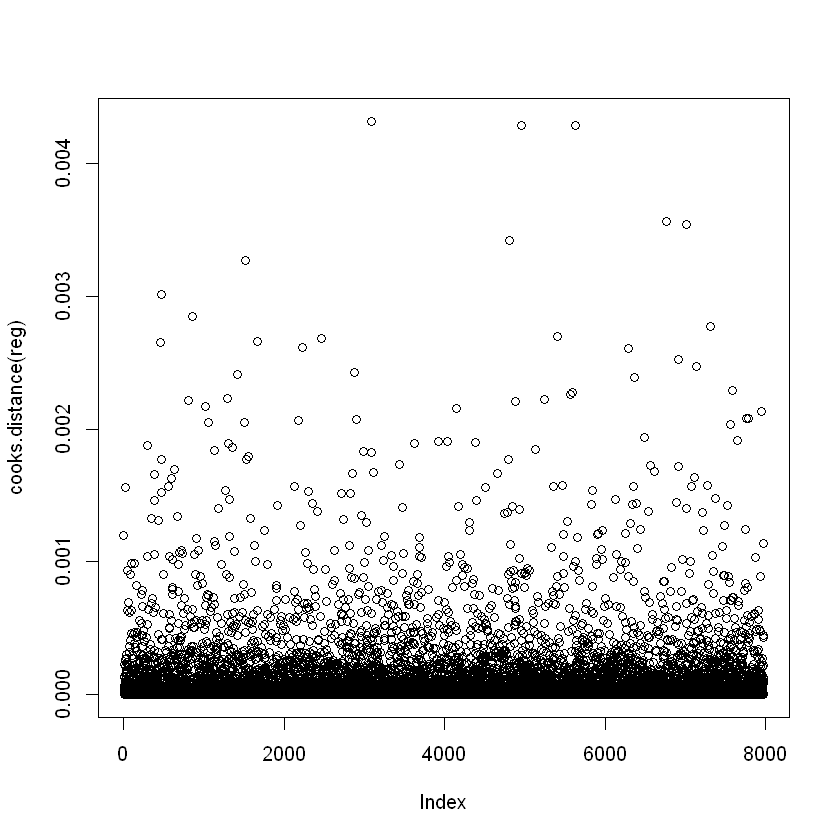

In [9]:
plot(cooks.distance(reg))

All Cook distances are below 1, so there's no points perturbing the model